# SHAP

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV, VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz

import shap

In [2]:
train = pd.read_csv(r'C:\WORK\Kaggle\house_price\train.csv', header = 0)
test = pd.read_csv(r'C:\WORK\Kaggle\house_price\test.csv', header = 0)

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
nulls = train.isnull().sum().sort_values(ascending = False)
nulls = nulls[nulls > 0]

to_drop = nulls[:5].index.tolist()
train.drop(to_drop, axis = 1, inplace = True)

obj_cols = train.select_dtypes('object').columns
train.drop(obj_cols, axis = 1, inplace = True)

train.drop(['Id'], axis =1, inplace = True)

train.fillna(train.mean(), inplace = True)

In [4]:
# prepare model
X = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=0)

## Global Interpretability

### (1) Feature importance plot

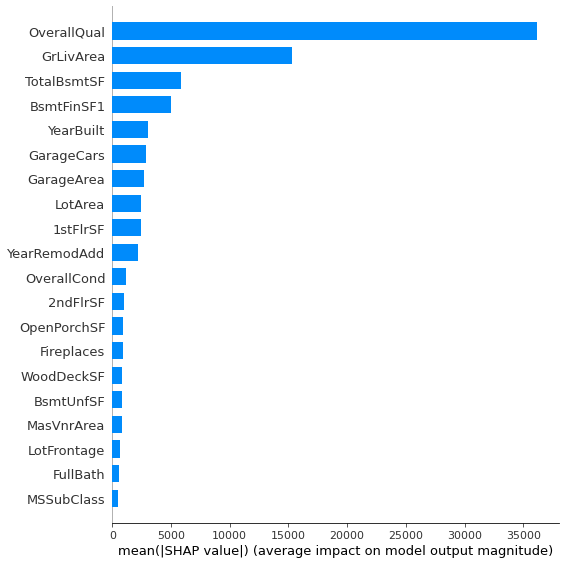

In [5]:
shap_imp = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_imp, X_train, plot_type = 'bar')

### (2) Summary plot
Describes positive/negative relationship between each variable and target,

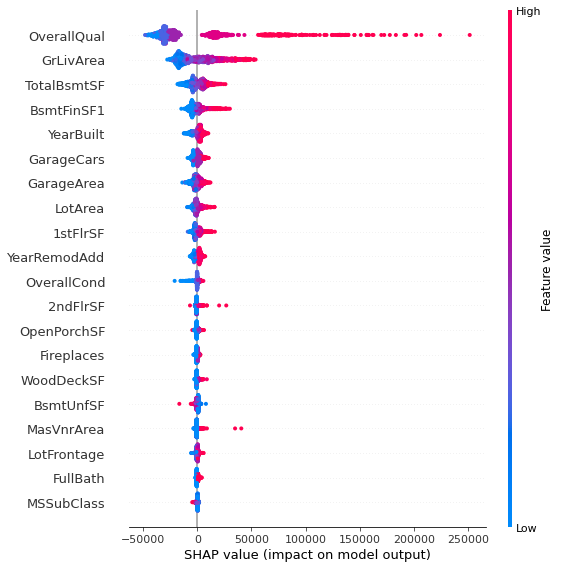

In [6]:
shap.summary_plot(shap_imp, X_train)

### (3) Dependence plot

#### `GrLivArea`

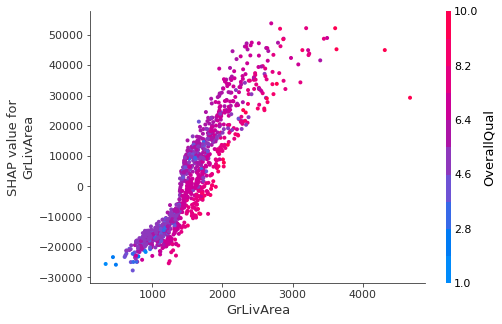

In [7]:
shap.dependence_plot('GrLivArea', shap_imp, X_train)

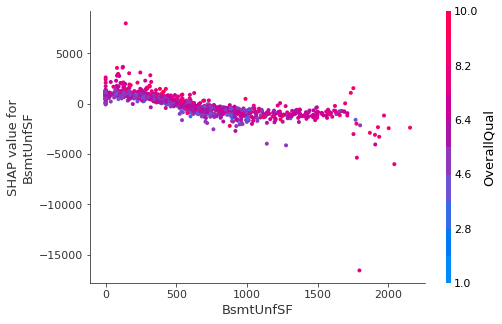

In [8]:
shap.dependence_plot('BsmtUnfSF', shap_imp, X_train)

## Local interpretability

### (1) Force plot

In [9]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

In [10]:
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[20,:], X_val.iloc[20,:])

In [11]:
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[50,:], X_val.iloc[50,:])

## Decision plot

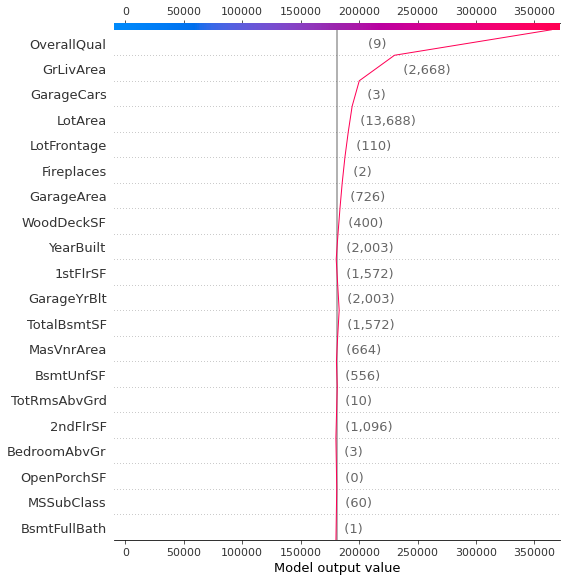

In [15]:
shap.decision_plot(explainer.expected_value, shap_values[50,:], X_val.iloc[50,:])

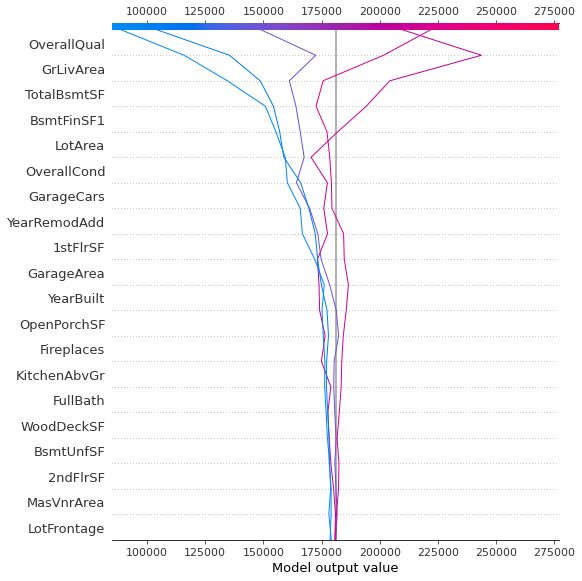

In [25]:
shap.decision_plot(explainer.expected_value, shap_values[:5,:], X_val.iloc[:5,:])